In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

DATA IMPORT AND CLEANING

In [2]:
# Imports Big Mac Data
bmi = pd.read_csv('Big mac data.csv')

# Only selects data from 2018
bmi = bmi[bmi['date']=='2018-01-01'].reset_index().drop(['index','EUR','GBP', 'JPY','CNY'], axis=1)

# Renames Columns
my_dict={}
old_names = list(bmi.columns)
new_names = ['Date', 'Country Code', 'Currency', 'Name', 'Local P (Big Mac)', 'USD ex rate', 'Local P in USD (Big Mac)', '% change vs USD']
for i in range(len(old_names)):
    my_dict[old_names[i]] = new_names[i]
bmi.rename(my_dict, axis=1, inplace=True)

In [3]:
# Computes Big Mac Implied Real Exchange Rate as EP*/P and set q US == 100
bmi['Real Ex. Rate (Big Mac)'] = (bmi['Local P in USD (Big Mac)']/float(bmi[bmi['Country Code']=='USA']['Local P (Big Mac)']))*100
bmi = bmi.round(decimals=3)

In [4]:
bmi

,Date,Country Code,Currency,Name,Local P (Big Mac),USD ex rate,Local P in USD (Big Mac),% change vs USD,Real Ex. Rate (Big Mac)
0,2018-01-01,ARG,ARS,Argentina,75.00,18.938,3.960,-0.141,85.909
1,2018-01-01,AUS,AUD,Australia,5.90,1.254,4.706,0.021,102.085
2,2018-01-01,BRA,BRL,Brazil,16.50,3.228,5.112,0.109,110.882
3,2018-01-01,GBR,GBP,Britain,3.19,0.723,4.413,-0.043,95.728
4,2018-01-01,CAN,CAD,Canada,6.55,1.246,5.257,0.140,114.040
5,2018-01-01,CHL,CLP,Chile,2600.00,605.935,4.291,-0.069,93.078
6,2018-01-01,CHN,CNY,China,20.40,6.432,3.172,-0.312,68.799
7,2018-01-01,COL,COP,Colombia,10900.00,2844.120,3.832,-0.169,83.134
8,2018-01-01,CRI,CRC,Costa Rica,2290.00,568.530,4.028,-0.126,87.374
9,2018-01-01,CZE,CZK,Czech Republic,79.00,20.747,3.808,-0.174,82.598


In [5]:
# Imports Clean ICP data from Custom Made Excel
icp = pd.read_excel('ICP data-48-53.xlsx',sheet_name='Data')
icp

,Country,Price Level Index (World = 100)
0,Argentina,93.5
1,Australia,168.0
2,Brazil,104.5
3,Britain,144.0
4,Canada,142.1
5,Chile,105.8
6,China,87.9
7,Colombia,68.9
8,Costa Rica,94.1
9,Czech Republic,84.0


In [6]:
# Merges the two datasets together
final_df = bmi.merge(icp, left_on='Name', right_on='Country').drop(['Date','Country'], axis=1)

In [7]:
# Computes ICP Price Level Index as P*/P US to set US == 100
final_df['Real Ex. Rate (ICP)'] = (final_df['Price Level Index (World = 100)']/float(final_df[final_df['Country Code']=='USA']['Price Level Index (World = 100)']))*100
final_df = final_df.round(decimals=3).dropna()

In [8]:
final_df.to_csv('Final df.csv')

In [9]:
final_df

,Country Code,Currency,Name,Local P (Big Mac),USD ex rate,Local P in USD (Big Mac),% change vs USD,Real Ex. Rate (Big Mac),Price Level Index (World = 100),Real Ex. Rate (ICP)
0,ARG,ARS,Argentina,75.00,18.938,3.960,-0.141,85.909,93.5,65.248
1,AUS,AUD,Australia,5.90,1.254,4.706,0.021,102.085,168.0,117.237
2,BRA,BRL,Brazil,16.50,3.228,5.112,0.109,110.882,104.5,72.924
3,GBR,GBP,Britain,3.19,0.723,4.413,-0.043,95.728,144.0,100.488
4,CAN,CAD,Canada,6.55,1.246,5.257,0.140,114.040,142.1,99.163
5,CHL,CLP,Chile,2600.00,605.935,4.291,-0.069,93.078,105.8,73.831
6,CHN,CNY,China,20.40,6.432,3.172,-0.312,68.799,87.9,61.340
7,COL,COP,Colombia,10900.00,2844.120,3.832,-0.169,83.134,68.9,48.081
8,CRI,CRC,Costa Rica,2290.00,568.530,4.028,-0.126,87.374,94.1,65.666
9,CZE,CZK,Czech Republic,79.00,20.747,3.808,-0.174,82.598,84.0,58.618


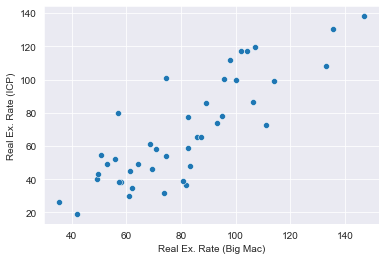

In [36]:
# Plots Big Mac implied Real Exchange Rate vs ICP implied Real Exchange Rate
sns.scatterplot(x=final_df['Real Ex. Rate (Big Mac)'], y=final_df['Real Ex. Rate (ICP)'])
plt.savefig('scatter Big Mac vs ICP.png')

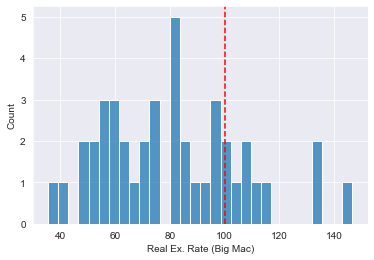

In [11]:
# Undervalued vs Overvalued Countries according to q BIG MAC
sns.histplot(final_df['Real Ex. Rate (Big Mac)'], bins=30, kde=False)
plt.axvline(x=100, color='red', linestyle='--')

C:\Users\sicgi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


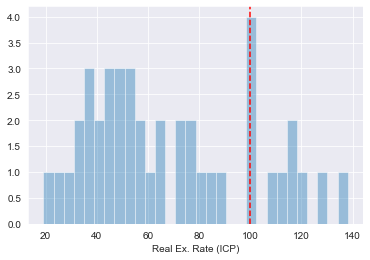

In [12]:
# Undervalued vs Overvalued Countries according to q ICP
sns.distplot(final_df['Real Ex. Rate (ICP)'], bins=30, kde=False)
plt.axvline(x=100, color='red', linestyle='--')

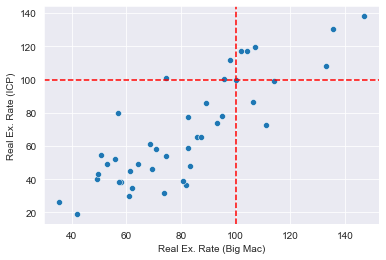

In [42]:
# Shows, depending on the quadrant, whether a country is under/over valued according to either Real Exchange Rate
sns.scatterplot(x=final_df['Real Ex. Rate (Big Mac)'], y=final_df['Real Ex. Rate (ICP)'])
plt.axvline(x=100, color='red', linestyle='--')
plt.axhline(y=100, color='red', linestyle='--')

plt.savefig('Scatter with crosses.png')

EXPLORATORY DATA ANALYSIS & REGRESSION MODEL

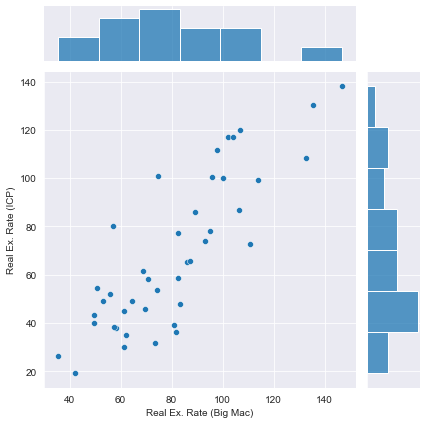

In [14]:
sns.jointplot(x='Real Ex. Rate (Big Mac)', y='Real Ex. Rate (ICP)', data=final_df)

In [15]:
dff = final_df[['Real Ex. Rate (ICP)', 'Real Ex. Rate (Big Mac)']]

,Real Ex. Rate (ICP),Real Ex. Rate (Big Mac)
Real Ex. Rate (ICP),1.000000,0.838651
Real Ex. Rate (Big Mac),0.838651,1.000000


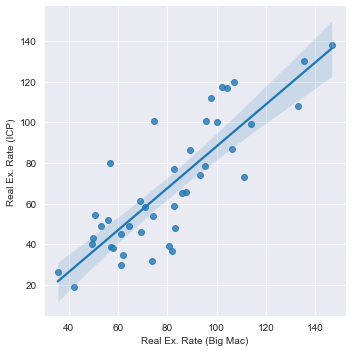

In [16]:
sns.lmplot(x='Real Ex. Rate (Big Mac)', y='Real Ex. Rate (ICP)', data=final_df)

In [17]:
# Linear Regression Model (OLS) (with Statsmodels)
import statsmodels.api as sm
X = final_df['Real Ex. Rate (Big Mac)']
X = sm.add_constant(X)
y = final_df['Real Ex. Rate (ICP)']
model = sm.OLS(y, X).fit()
print(model.summary())

C:\Users\sicgi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\sicgi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


                             OLS Regression Results                            
Dep. Variable:     Real Ex. Rate (ICP)   R-squared:                       0.703
Model:                             OLS   Adj. R-squared:                  0.696
Method:                  Least Squares   F-statistic:                     94.83
Date:                 Fri, 24 Mar 2023   Prob (F-statistic):           4.13e-12
Time:                         16:55:20   Log-Likelihood:                -178.62
No. Observations:                   42   AIC:                             361.2
Df Residuals:                       40   BIC:                             364.7
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

C:\Users\sicgi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


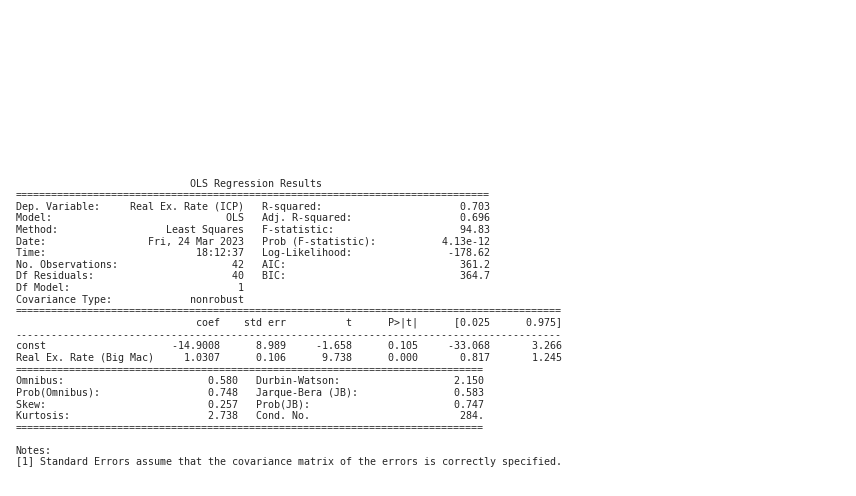

In [44]:
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('output.png')

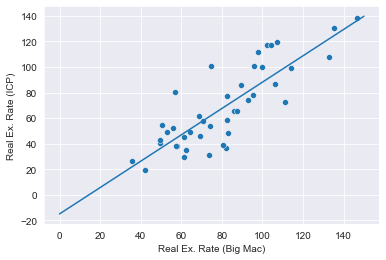

In [18]:
sns.scatterplot(x='Real Ex. Rate (Big Mac)', y='Real Ex. Rate (ICP)', data=final_df)
x_2 = np.linspace(0,150,1000)
y_2 = -14.9008 + 1.0307*x_2
plt.plot(x_2, y_2)

In [35]:
import dataframe_image as dfi
dfi.export(final_df[['Name', 'Local P (Big Mac)', 'USD ex rate',
          'Local P in USD (Big Mac)', '% change vs USD',
          'Real Ex. Rate (Big Mac)', 'Price Level Index (World = 100)',
          'Real Ex. Rate (ICP)']].head(17), 'final_df(1-17).png')
dfi.export(final_df.loc[final_df.index>17][['Name', 'Local P (Big Mac)', 'USD ex rate',
                                           'Local P in USD (Big Mac)', '% change vs USD',
                                           'Real Ex. Rate (Big Mac)', 'Price Level Index (World = 100)',
                                           'Real Ex. Rate (ICP)']], 'final_df(18-33).png')
dfi.export(final_df[['Name', 'Local P (Big Mac)', 'USD ex rate',
                     'Local P in USD (Big Mac)', '% change vs USD',
                     'Real Ex. Rate (Big Mac)', 'Price Level Index (World = 100)',
                     'Real Ex. Rate (ICP)']].tail(9), 'final_df(34-42).png')